In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
import numpy as np
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4246343449998974727
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2915513140
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11337646130143671448
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.20,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

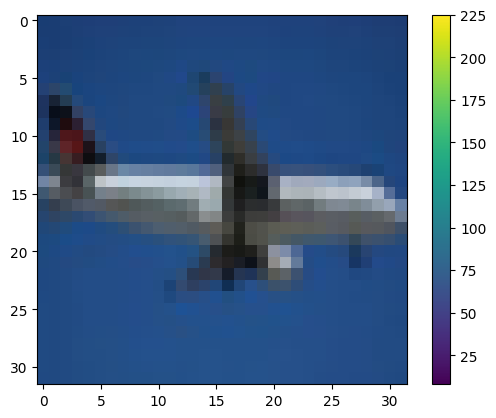

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
# plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [9]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# x_train = x_train.reshape(x_train.shape[0], 3072)
# x_val = x_val.reshape(x_val.shape[0], 3072)
# x_test = x_test.reshape(x_test.shape[0], 3072)

# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [6]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [7]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2
model = models.Sequential()
# model.add(layers.Dense(1024,input_shape=(3072,)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(256))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(10, activation='softmax'))
model.add(keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(Dropout(0.3))
model.add(keras.layers.Dense(32, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       1

In [9]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks
# check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h1',
#                                            save_best_only=True)
# early_stopping_cb = callbacks.EarlyStopping(patience=5,
#                                             monitor='val_loss',
#                                             restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size = 256, epochs=20,
                    validation_data=(x_val, y_val))
                    # callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
157/157 [==============================] - 14s 33ms/step - loss: 2.5343 - accuracy: 0.3682 - val_loss: 2.8067 - val_accuracy: 0.1616
Epoch 2/20
157/157 [==============================] - 5s 29ms/step - loss: 1.6306 - accuracy: 0.5391 - val_loss: 2.2502 - val_accuracy: 0.2822
Epoch 3/20
157/157 [==============================] - 4s 28ms/step - loss: 1.2810 - accuracy: 0.6036 - val_loss: 1.4774 - val_accuracy: 0.5326
Epoch 4/20
157/157 [==============================] - 5s 29ms/step - loss: 1.1224 - accuracy: 0.6402 - val_loss: 1.4927 - val_accuracy: 0.5034
Epoch 5/20
157/157 [==============================] - 5s 29ms/step - loss: 1.0315 - accuracy: 0.6629 - val_loss: 1.3079 - val_accuracy: 0.5690
Epoch 6/20
157/157 [==============================] - 5s 29ms/step - loss: 0.9706 - accuracy: 0.6794 - val_loss: 1.1513 - val_accuracy: 0.6248
Epoch 7/20
157/157 [==============================] - 5s 29ms/step - loss: 0.9270 - accuracy: 0.6960 - val_loss: 1.2736 - val_accuracy: 0.593

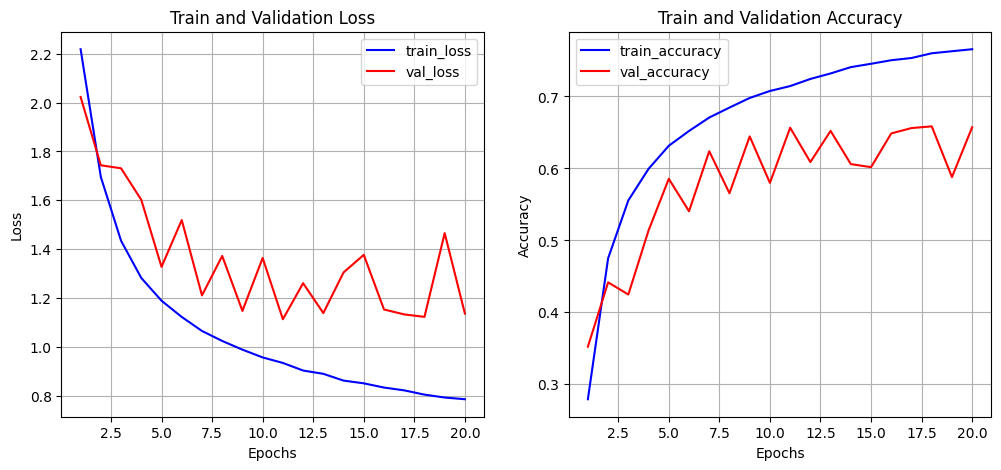

In [55]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [51]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1027 - accuracy: 0.6631


[1.1026978492736816, 0.663100004196167]